In [1]:
from fit_modelSignal import *
from fit_modelControl import *
from scipy.optimize import minimize
import numdifftools as nd

from timeit import default_timer as timer

In [2]:
baseDir = common.getBaseDirectory()
shaping = True

if shaping:
    X0 = np.load(baseDir + "data/templates/shaping_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/shaping_controlRegion/X_.npy")
else:
    X0 = np.load(baseDir + "data/templates/counting_signalRegion/X_.npy")
    X1 = np.load(baseDir + "data/templates/counting_controlRegion/X_.npy")

    
Y0 = np.sum(X0,axis=1) + 0.1
Y1 = np.sum(X1,axis=1) + 0.1

model0 = PredictiveModel_Signal (X0,shaping)
model1 = PredictiveModel_Control(X1,shaping)


# define Model

In [4]:
def loss (param):
    y0 = model0.predict(param)
    y1 = model1.predict(param)
    loss  = np.sum( (y0-Y0)**2/(2*Y0) )
    loss += np.sum( (y1-Y1)**2/(2*Y1) )
    loss += np.sum( (param[3:]**2)/2  )
    return loss

param0 = np.array([0.107,0.108,0.1090] + [0.0]*22)
start = timer()
result = minimize( loss, param0, method='SLSQP', bounds = [(0,1)]*3 + [(-1,1)]*22 )
end   = timer()
print(result.x[:3])

print('fitting time = {:6.4f} ms'.format( (end-start)*1000 ))

[0.10800915 0.10800741 0.10802766]
fitting time = 733.5724 ms


hessian time = 1506.7527 ms


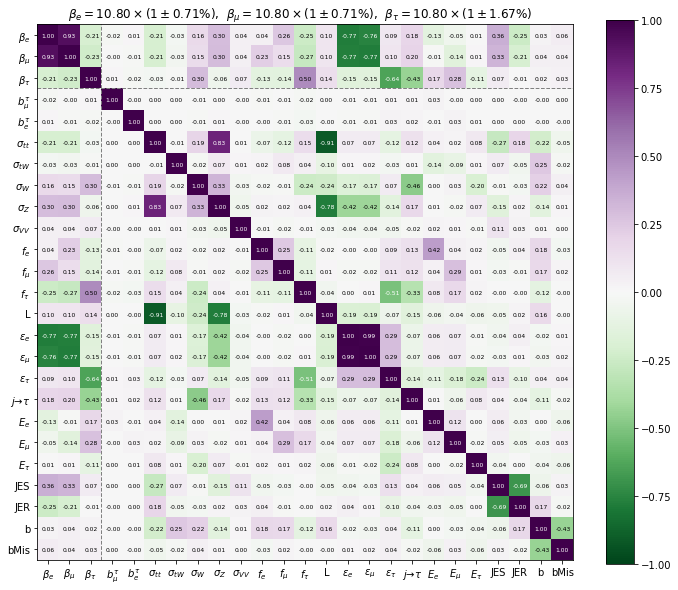

In [5]:
start = timer()
hcalc = nd.Hessian(loss, step=1e-4, method='central')
hess  = hcalc( result.x )
end   = timer()
hessinv = np.linalg.inv(hess)
sig   = np.sqrt(hessinv.diagonal())
cor  = hessinv/np.outer(sig, sig)

print('hessian time = {:6.4f} ms'.format( (end-start)*1000 ))
commonp.showParameterCovMat(cor,sig)

In [6]:
for i in range(sig.size):
    c,s = result.x[i], sig[i]
    print('{:7.4f} +/- {:6.4f}'.format(c,s))

 0.1080 +/- 0.0013
 0.1080 +/- 0.0012
 0.1080 +/- 0.0026
-0.0007 +/- 0.9993
-0.0013 +/- 0.9989
-0.0115 +/- 0.5498
 0.0170 +/- 0.9311
 0.0091 +/- 0.9401
-0.0094 +/- 0.6620
 0.0021 +/- 0.9991
 0.0035 +/- 0.3747
 0.0018 +/- 0.1731
 0.0121 +/- 0.6729
 0.0035 +/- 0.8115
-0.0026 +/- 0.9403
-0.0032 +/- 0.9001
 0.0283 +/- 0.5897
-0.0239 +/- 0.4925
 0.0027 +/- 0.1941
 0.0016 +/- 0.3546
 0.0054 +/- 0.2905
 0.0049 +/- 0.3255
 0.0023 +/- 0.4913
 0.0012 +/- 0.0385
-0.0026 +/- 0.6903


In [6]:
# print(sig[0:3]/0.1080*100)
# print(1/sig[3:])